# Hotel Booking - Analysis & Prediction

## Table of Contents
1. [Introduction](#introduction)
2. [Gathering Data](#gathering-data)
3. [Assessing Data](#assessing-data)
4. [Quality Issues](#quality-issues)
5. [Cleaning Data](#cleaning-data)
6. [Analyzing and Visualizing Data](#analyzing-and-visualizing-data)

### Introduction

This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. In this project, we'll try to find out the best time to book hotel room, the optimal length of stay to get best daily rate. We also try to predict if a hotel was likely to recieve a disproportionately high number of special requests.

### Gathering Data

In [2]:
# Importing libraries and loading data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline

df = pd.read_csv('E:\\DS\\project_blog\\hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Assessing Data

In [3]:
# Checking the number of rows in data
df.shape

(119390, 32)

In [4]:
# Identifying missing values in data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
# Descriptive statistics for numeric variables
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [6]:
# Identifying cloumns with most missing values
most_missing_cols = pd.DataFrame({'Count' : df.isnull().sum()[df.isnull().sum() > 0], 'Percentage' : df.isnull().sum()[df.isnull().sum() > 0] / (df.shape[0]) * (100)})
most_missing_cols

,Count,Percentage
children,4,0.003350
country,488,0.408744
agent,16340,13.686238
company,112593,94.306893


In [7]:
# Identifying duplicate data
df.duplicated().sum()

31994

### Quality Issues
1. Column adr is in an abbreviated form.
2. Column adr contains a negative value.
3. Column company has highest null values.
4. Column children has 4 null values and country has 488 null values.
5. Drop duplicate values.
6. Column adr has max rate 54000.

### Cleaning Data

In [8]:
# Renaming the column for better readability
df.rename(columns={'adr': 'average_daily_rate'}, inplace=True)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [9]:
# Dropping negative values
df.drop(df[df.average_daily_rate<1.0].index, inplace=True)
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,average_daily_rate,required_car_parking_spaces,total_of_special_requests
count,117428.000000,117428.000000,117428.000000,117428.000000,117428.000000,117428.000000,117428.000000,117428.000000,117424.000000,117428.000000,117428.000000,117428.000000,117428.000000,117428.000000,102037.000000,6379.000000,117428.000000,117428.000000,117428.000000,117428.000000
mean,0.374783,105.085133,2016.160268,27.137088,15.802875,0.936301,2.520975,1.860638,0.104510,0.007869,0.027872,0.086955,0.125336,0.216396,86.515617,194.160997,2.337977,103.532575,0.062643,0.571048
std,0.484069,106.907713,0.706566,13.575588,8.783592,0.995205,1.892450,0.482099,0.399699,0.097169,0.164608,0.848697,1.446216,0.632545,110.692599,130.890917,17.677201,49.197298,0.245567,0.791659
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,19.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,67.000000,0.000000,70.530000,0.000000,0.000000
50%,0.000000,71.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,195.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,162.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,274.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,709.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,4.000000,10.000000,10.000000,1.000000,26.000000,72.000000,18.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [10]:
# Dropping a column as it has 94% of missing values
df.drop('company', axis=1, inplace=True)
df.shape

(117428, 31)

In [11]:
# Verifying columns
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'average_daily_rate',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [12]:
# Deleting rows with null values for 'children' and 'country'
df.dropna(subset=['children', 'country'], inplace=True)

#### The missing values for children and country are 4 and 488 respectively which is less than 0% of total data set values. Dropping them will not cause any impact.

In [13]:
# Replacing the null values with 0 for 'agent'
df.agent.fillna(0, inplace=True)

In [14]:
# Verifying for null values
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

In [15]:
# Droping duplicate data
df = df.drop_duplicates()
df.duplicated().sum()

0

In [16]:
# Identifying an outlier data
df.query('average_daily_rate > 5000')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
48515,City Hotel,1,35,2016,March,13,25,0,1,2,...,1,Non Refund,12.0,0,Transient,5400.0,0,0,Canceled,2016-02-19


In [17]:
# Dropping an outlier
df.drop(index=48515, inplace=True)
df.query('average_daily_rate > 5000')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


### Analyzing and Visualizing Data

In [18]:
df.hotel.value_counts()

City Hotel      52340
Resort Hotel    32827
Name: hotel, dtype: int64

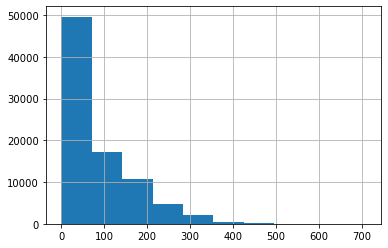

In [19]:
df['lead_time'].hist();

##### The graph shows that customers have preferred the advanced booking for their hotel room.

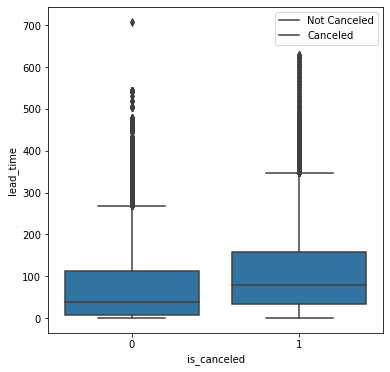

In [20]:
# Bivariate plot of is_canceled vs lead_time to find out distribution
plt.figure(figsize=[6,6])
default_color=sns.color_palette()[0]

sns.boxplot(data=df, x='is_canceled', y='lead_time', color=default_color);
plt.legend(['Not Canceled', 'Canceled'])

##### This boxplot graph shows that bookings were made a few days before the arrival date are rarely get canceled, as compared with bookings made over a year in advanced.

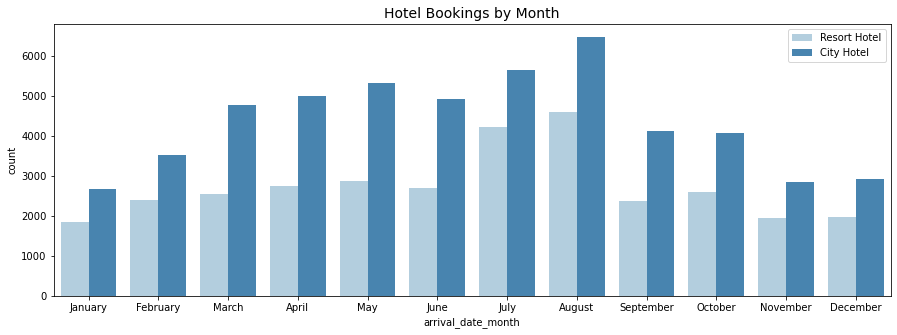

In [21]:
# Bivariate plot of arrival_date_month vs hotel to find out booking status
plt.figure(figsize=[15,5])

sns.countplot(data=df, x='arrival_date_month', hue='hotel', palette='Blues', order=["January","February","March","April","May","June","July","August","September","October","November","December"]);
plt.title("Hotel Bookings by Month", fontsize=14);
plt.legend(['Resort Hotel', 'City Hotel']);

##### The above graph shows that maximum hotel bookings were made during the mid of a year. The customers have preferred to book hotel rooms around 30 to 120 days in advanced. As the Bookings made over 6 months and later in advanced were oftenly get canceled.

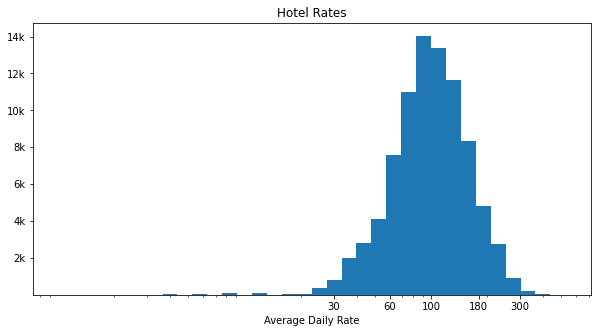

In [22]:
# There's a long tail in distribution, so putting it on a log scale to find out the distribution
log_binsize = 0.08
bins = 10 ** np.arange(0, np.log10(df['average_daily_rate'].max())+log_binsize, log_binsize)

plt.figure(figsize=[10, 5])
plt.hist(data =df, x='average_daily_rate', bins=bins)
plt.xscale('log')
plt.xticks([30, 60, 100, 180, 300], [30, 60, 100, 180, 300])
plt.yticks([2e3, 4e3, 6e3, 8e3, 10e3, 12e3, 14e3],['2k', '4k', '6k', '8k', '10k', '12k', '14k'])
plt.xlabel('Average Daily Rate')
plt.title('Hotel Rates')
plt.show();

#### When plotted on a log scale, the average daily rate distribution looks unimodel, with highest peak around 100.

In [35]:
# Writing a fucntion for line graph
def display_lineplot(df, col1, col2, col3, xlabel, ylabel, title):
    """ This function will plot a line graph for provided data
    
    Args:
        df: the pandas dataframe you want to use
        col1: the column name you want to use for x-axis
        col2: the column name you want to use for y-axis
        col3: the column name you want to use for hue
        xlabel: to add a x-axis label
        ylabel: to add a y-axis label
        title: to add a plot title

    Example:
        display_lineplot(df, 'column1', 'column2', column3', 'x label', 'y label', 'title')
        
    """
    sns.lineplot(data=df, x=col1, y=col2, hue=col3)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.title(title, fontsize=14)

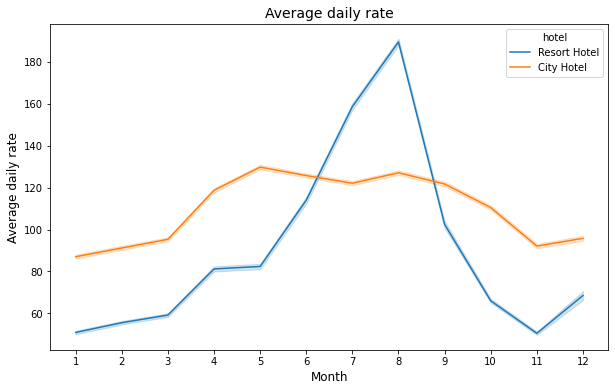

In [427]:
# Multivariate plot to find out average daily rate for hotel by month
months_map={"January":1,"February":2,"March":3,"April":4,"May":5,"June":6,"July":7,"August":8,"September":9,"October":10,"November":11,"December":12}
df["arrival_date_month"]=df["arrival_date_month"].map(months_map)

plt.figure(figsize=[10, 6])
sns.lineplot(data=df, x='arrival_date_month', y='average_daily_rate',hue='hotel')
plt.title("Average daily rate", fontsize=14)
plt.ylabel("Average daily rate", fontsize=12)
plt.xlabel("Month", fontsize=12)
plt.xticks(range(1,13))
plt.show()

In [428]:
df.groupby(["hotel"])['average_daily_rate'].agg(["mean","std","min","median","max"])

,mean,std,min,median,max
hotel,,,,,
City Hotel,113.178067,39.552254,1.00,106.25,510.0
Resort Hotel,101.620435,62.814249,1.56,81.00,508.0


In [429]:
df.groupby(["hotel","arrival_date_month"])['average_daily_rate'].agg(["mean","std","min","median","max"])

mean        std   min  median     max
hotel        arrival_date_month                                             
City Hotel   1                    87.037404  25.366479  1.00   81.90  284.20
             2                    91.196621  29.130534  1.00   85.00  284.20
             3                    95.339822  31.417605  1.00   89.10  285.00
             4                   118.722073  37.553475  6.00  112.00  336.00
             5                   129.789675  38.555867  6.00  126.00  510.00
             6                   125.745768  37.180841  6.00  120.00  333.67
             7                   122.095986  40.866739  6.00  116.10  365.00
             8                   127.081666  44.107911  6.00  122.40  372.33
             9                   121.736783  38.810896  2.00  117.45  345.00
             10                  110.465116  33.830574  3.00  107.00  300.00
             11                   92.118746  30.518646  4.50   85.75  260.00
             12                   95.800501  34.451480  1.29   88.00  451.50
Resort Hotel 1                    50.906270  18.283736  4.00   48.00  149.00
             2                    55.550327  21.438114  4.00   50.00  174.00
             3                    59.190852  23.872288  4.00   56.00  193.71
             4                    81.207593  32.898785  3.00   76.50  270.00
             5                    82.376688  33.257272  2.00   76.00  225.50
             6                   114.017628  43.496509  4.00  107.80  318.82
             7                   158.646003  53.731672  1.80  154.00  508.00
             8                   189.494725  57.297144  1.56  189.00  450.00
             9                   102.456997  41.685071  4.00   92.09  307.50
             10                   65.998421  26.579738  1.56   60.00  246.02
             11                   50.487605  19.144546  4.00   46.98  175.00
             12                   68.522663  46.508186  2.00   55.80  384.00

#### The average daily rate fluctuated more for resort hotels than city hotels with standard deviations of 62 and 39 respectively. This fluctualtion was inclined to its pick during the mid year with prices ranging from 80 to 180. The prices were declined during the end of year, ranging from 69 to 50. There was a small peak in December, probably due to Christmas and New Years. The city hotels maintain higher price throughout the year.

Text(0.5, 0, 'Lead time (days)')

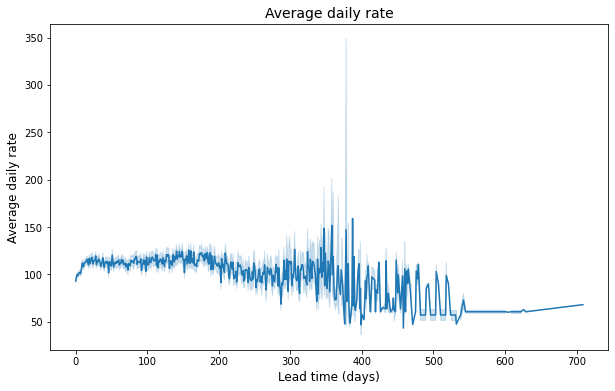

In [430]:
# Bivariate plot to find out relation between lead time and average daily rate
plt.figure(figsize=[10, 6])

sns.lineplot(data=df, x='lead_time', y='average_daily_rate')
plt.title("Average daily rate", fontsize=14)
plt.ylabel("Average daily rate", fontsize=12)
plt.xlabel("Lead time (days)", fontsize=12)

### What is the best time of year to book a hotel room?
#### Booking made at least 175 days in advanced seem to give a lower price in general. Alternatively, to try at last minute deals within 10 days of the booking.

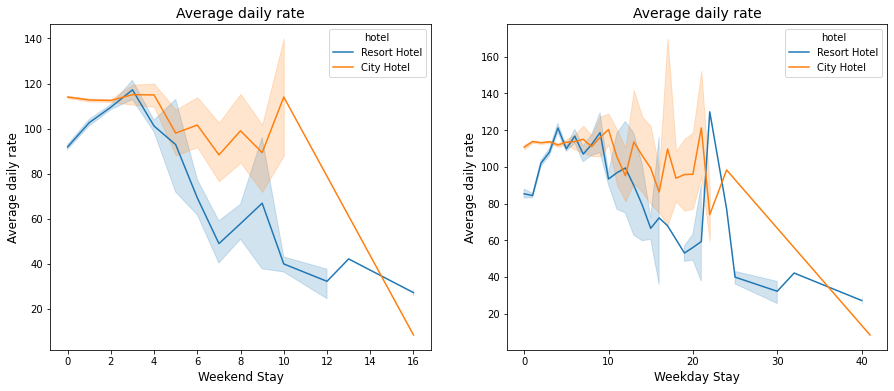

In [38]:
# Multivariate plot to find out relation between average daily rate and hotel stay
plt.figure(figsize=[15, 6])

plt.subplot(1,2,1)
display_lineplot(df, 'stays_in_weekend_nights', 'average_daily_rate','hotel', 'Weekend Stay', 'Average daily rate', 'Average daily rate');

plt.subplot(1,2,2)
display_lineplot(df, 'stays_in_week_nights', 'average_daily_rate','hotel', 'Weekday Stay', 'Average daily rate', 'Average daily rate');

In [432]:
df.groupby(["hotel"])['stays_in_weekend_nights'].agg(["mean","std","min","median","max"])

,mean,std,min,median,max
hotel,,,,,
City Hotel,0.881563,0.907128,0,1.0,16
Resort Hotel,1.239528,1.152583,0,1.0,16


In [433]:
df.groupby(["hotel"])['stays_in_week_nights'].agg(['mean','std','min','median','max'])

,mean,std,min,median,max
hotel,,,,,
City Hotel,2.294918,1.591510,0,2.0,41
Resort Hotel,3.234228,2.460051,0,3.0,40


### What is the optimal length of stay in order to get the best daily rate?

#### Customers were more likely to book a hotel over the weekday as majority of them didn't even stay over for one weekend night. This was reflected in hotel daily rate. The weekend rates were comparatively lower than weekday rates.

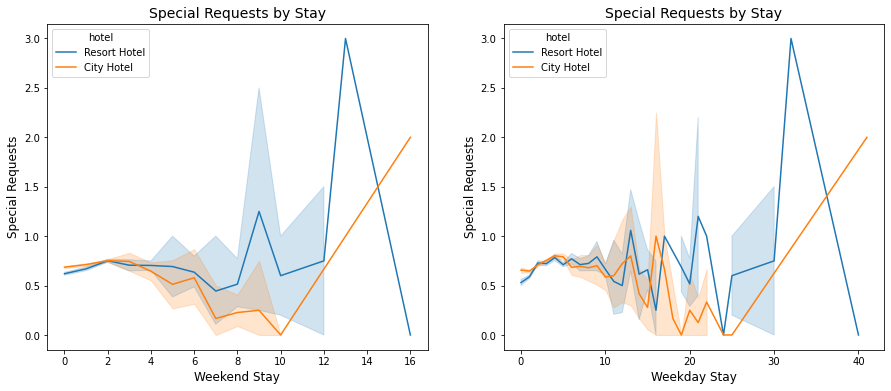

In [39]:
# Multivariate plot to find out relation between special requests and hotel stay
plt.figure(figsize=[15, 6])

plt.subplot(1,2,1)
display_lineplot(df, 'stays_in_weekend_nights', 'total_of_special_requests', 'hotel', 'Weekend Stay','Special Requests', 'Special Requests by Stay')

plt.subplot(1,2,2)
display_lineplot(df, 'stays_in_week_nights', 'total_of_special_requests', 'hotel', 'Weekday Stay', 'Special Requests', 'Special Requests by Stay')

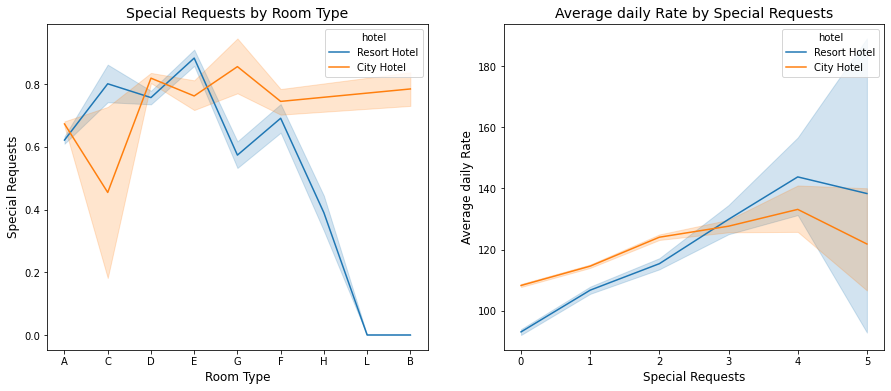

In [41]:
# Multivariate plot to find out relation between special reqeusts, room type, and average daily rate by hotel
plt.figure(figsize=[15, 6])

plt.subplot(1,2,1)
display_lineplot(df, 'reserved_room_type', 'total_of_special_requests','hotel', 'Room Type', 'Special Requests', 'Special Requests by Room Type');

plt.subplot(1,2,2)
display_lineplot(df, 'total_of_special_requests', 'average_daily_rate', 'hotel', 'Special Requests', 'Average daily Rate', 'Average daily Rate by Special Requests');

#### Any room type as well as the number of special requests increases the price.

In [434]:
# Dropping columns that are not useful
drop_col = ['days_in_waiting_list','arrival_date_year','assigned_room_type','booking_changes','reservation_status', 'country']
df.drop(drop_col, axis=1, inplace=True)

In [435]:
# Creating numerical and categorical dataframes
cat_var = df[['hotel','meal','market_segment','distribution_channel','reserved_room_type','deposit_type','customer_type']]

num_var = df[['lead_time','arrival_date_week_number','arrival_date_day_of_month','stays_in_weekend_nights','stays_in_week_nights','adults','children',
           'babies','is_repeated_guest','previous_cancellations','previous_bookings_not_canceled','agent','average_daily_rate','required_car_parking_spaces','total_of_special_requests']]

In [436]:
# Encoding categorical variables
cat_var['hotel'] = cat_var['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})
cat_var['meal'] = cat_var['meal'].map({'BB' : 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4})
cat_var['market_segment'] = cat_var['market_segment'].map({'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO': 3, 'Complementary': 4, 'Groups': 5, 'Undefined': 6, 'Aviation': 7})
cat_var['distribution_channel'] = cat_var['distribution_channel'].map({'Direct': 0, 'Corporate': 1, 'TA/TO': 2, 'Undefined': 3, 'GDS': 4})
cat_var['reserved_room_type'] = cat_var['reserved_room_type'].map({'C': 0, 'A': 1, 'D': 2, 'E': 3, 'G': 4, 'F': 5, 'H': 6, 'L': 7, 'B': 8})
cat_var['deposit_type'] = cat_var['deposit_type'].map({'No Deposit': 0, 'Refundable': 1, 'Non Refund': 3})
cat_var['customer_type'] = cat_var['customer_type'].map({'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3})

C:\Users\ADMINI~1\AppData\Local\Temp\2/ipykernel_12864/3138776477.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_var['hotel'] = cat_var['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})
C:\Users\ADMINI~1\AppData\Local\Temp\2/ipykernel_12864/3138776477.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_var['meal'] = cat_var['meal'].map({'BB' : 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4})
C:\Users\ADMINI~1\AppData\Local\Temp\2/ipykernel_12864/3138776477.py:3: SettingWithCopyWarning: 
A valu

In [437]:
num_var.var()

lead_time                          7391.477350
arrival_date_week_number            185.445050
arrival_date_day_of_month            78.082208
stays_in_weekend_nights               1.048088
stays_in_week_nights                  4.098200
adults                                0.251491
children                              0.210592
babies                                0.012882
is_repeated_guest                     0.033110
previous_cancellations                0.133357
previous_bookings_not_canceled        2.756828
agent                             12114.516108
average_daily_rate                 2513.822484
required_car_parking_spaces           0.079119
total_of_special_requests             0.690268
dtype: float64

In [438]:
# Normalizing numerical variables
num_var['lead_time'] = np.log(num_var['lead_time'] + 1)
num_var['arrival_date_week_number'] = np.log(num_var['arrival_date_week_number'] + 1)
num_var['arrival_date_day_of_month'] = np.log(num_var['arrival_date_day_of_month'] + 1)
num_var['agent'] = np.log(num_var['agent'] + 1)
num_var['average_daily_rate'] = np.log(num_var['average_daily_rate'] + 1)

C:\Users\ADMINI~1\AppData\Local\Temp\2/ipykernel_12864/1933992840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_var['lead_time'] = np.log(num_var['lead_time'] + 1)
C:\Users\ADMINI~1\AppData\Local\Temp\2/ipykernel_12864/1933992840.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_var['arrival_date_week_number'] = np.log(num_var['arrival_date_week_number'] + 1)
C:\Users\ADMINI~1\AppData\Local\Temp\2/ipykernel_12864/1933992840.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy

In [446]:
# Spliting into explanatory and response variables
X1 = pd.concat([cat_var, num_var], axis=1)
y1 = df['total_of_special_requests']

# Spliting into train and test
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.30)

# Instatiating and fitting a model
lm_model = LinearRegression(normalize=True) 
lm_model.fit(X1_train, y1_train) 

# Predict and score a model
y1_test_preds = lm_model.predict(X1_test)

# Rsquared and y_test
rsquared_score = r2_score(y1_test, y1_test_preds)
length_y1_test = len(y1_test)

"The r-squared score for model was {} on {} values.".format(rsquared_score, length_y1_test)

'The r-squared score for model was 1.0 on 25551 values.'

### How well we predict whether or not a hotel was likely to recieve a disproportionately high number of special requests?

#### A regression model fits the data well. This indicates that a hotel was likely to receive a disproportionately high number of special requests.